In [2]:
import numpy as np
import pandas as pd
import json
from scipy import optimize
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
import uncertainties as unc
from scipy.integrate import odeint

# COVID SIR Model

### Parameters

In [52]:
# Total population, N.
N = 10**4
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 100, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1./5, 1./10

# A grid of time points (in days)
t = np.linspace(0, 160)

In [53]:
# The SIR model differential equations.
def derivSIR(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [54]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(derivSIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

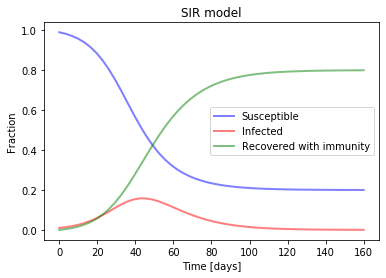

In [55]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
plt.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time [days]')
plt.ylabel('Fraction')
#plt.ylim(0,1.2)
#ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = plt.legend()
legend.get_frame().set_alpha(0.8)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)

plt.title ('SIR model')
plt.savefig('model_SIR.png', dpi = 300)
plt.show()

# COVID SEIR Model

### Parameters

In [19]:
# Total population, N.
N = 10**3
# Initial number of infected and recovered individuals, I0 and R0.
E0, I0, R0 = 100, 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
betaI, betaE, gammaI, sigma, gammaE, mu, nu = 2*0.1, 2*0.1, 1./(6*7), 1./5, 1./(2*7), 1./(800*365), 1./10**2

# A grid of time points (in days)
t = np.linspace(0, 160)

In [20]:
# The SEIR model differential equations.
def deriv(y, t, N, betaI, betaE, gammaI, sigma, gammaE, mu, nu):
    S, E, I, R = y
    dSdt = mu * (N-S) - S * (betaI * I / N + betaE * E / N ) - nu * S
    dEdt = S * (betaI * I / N + betaE * E / N) - (mu + sigma * 0.2 + gammaE * 0.8) * E
    dIdt = sigma * 0.2 * E  - (mu + 0.03 + gammaI) * I
    dRdt = gammaE * E * 0.8 + gammaI * I - mu * R + nu * S 
    return dSdt, dEdt, dIdt, dRdt

In [21]:
# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, betaI, betaE, gammaI, sigma, gammaE, mu, nu))
S, E, I, R = ret.T

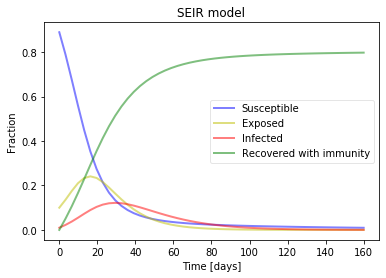

In [22]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
plt.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
plt.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time [days]')
plt.ylabel('Fraction')
#plt.ylim(0,1.2)
#ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = plt.legend()
legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)

plt.title ('SEIR model')
plt.savefig('model_SEIR.png', dpi = 300)
plt.show()